# Project Goals

(the cases in the event log are all connected to sepsis)

•	Filtering steps to remove noise.

•	Filtering steps to remove irrelevant data.

•	Segments of the log describing normal behavior.

•	Segments of the log describing anomalous behavior.

•	Compare the segments to verify their significant correlations with properties that may be connected to effectiveness (case size, case duration, loops) 

In [1]:
# imports

import pm4py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_columns', None)


# Data | Event Logs Attributes

- There are about 1000 cases with in total
- 15,000 events that were recorded for 16 different activities. 
- Moreover 39 data attributes are recorded

In [3]:
dataframe = pd.read_csv('.\sepsis_cases_event_log.csv', sep=',')
dataframe.columns


Index(['InfectionSuspected', 'org:group', 'DiagnosticBlood', 'DisfuncOrg',
       'SIRSCritTachypnea', 'Hypotensie', 'SIRSCritHeartRate', 'Infusion',
       'DiagnosticArtAstrup', 'concept:name', 'Age', 'DiagnosticIC',
       'DiagnosticSputum', 'DiagnosticLiquor', 'DiagnosticOther',
       'SIRSCriteria2OrMore', 'DiagnosticXthorax', 'SIRSCritTemperature',
       'time:timestamp', 'DiagnosticUrinaryCulture', 'SIRSCritLeucos',
       'Oligurie', 'DiagnosticLacticAcid', 'lifecycle:transition', 'Diagnose',
       'Hypoxie', 'DiagnosticUrinarySediment', 'DiagnosticECG', '@@classifier',
       '@@case_index', 'case:concept:name', 'Leucocytes', 'CRP', 'LacticAcid',
       'start_timestamp', '@@event_index'],
      dtype='object')

## Attributes


### Name			| Description
-------------------------------------------------------------------------------

1. Checkbox Att.

    - DisfuncOrg		| Checkbox: Disfunctional organ

    - Hypotensie		| Checkbox: Hypotension 

    - Hypoxie 		| Checkbox: Hypoxia

    - InfectionSuspected 	| Checkbox: Suspected infection

    - Infusion 		| Checkbox: Intravenous infusion required

    - Oligurie		| Checkbox: Oliguria 

2. Age:

    Keep Age as a NUMERICAL value OR Convert to a CATEGORICAL variable with ranges (e.g., 0-5, 6-10, etc.) instead of 5-year groups. This allows for more granular analysis if needed.

3. SIRS Criteria:

    Instead of separate checkboxes, create a single numerical attribute SIRSCriteriaCount to store the number of SIRS criteria met (0-4).
    - If 2 or More, SIRS is diagnosed.

    - SIRSCritHeartRate	| Checkbox: One of the SIRS criteria

    - SIRSCritLeucos		| Checkbox: One of the SIRS criteria
    
    - SIRSCritTachypnea	| Checkbox: One of the SIRS criteria
    
    - SIRSCritTemperature	| Checkbox: One of the SIRS criteria
     
    - SIRSCriteria2OrMore	| Checkbox: Two or more of the SIRS criteria 

4. Diagnostic Checkboxes:
    Diagnostic*		| Various checkboxes on the triage document
DiagnosticBlood || DiagnosticArtAstrup || DiagnosticIC || DiagnosticSputum || DiagnosticLiquor || DiagnosticOther || DiagnosticXthorax || DiagnosticUrinaryCulture || DiagnosticLacticAcid ||

5. org:group:

    This seems to represent relationships between organizational groups. You can likely leave this as-is or analyze it with graph algorithms.

6. Additional:
    - Standardize unit measurements for Leucocytes, CRP, and LacticAcid.

Leucocytes		| Leucocytes measurement

CRP			| CRP measurement

LacticAcid		| Lactic-acid measurement

org:group		| organizational groups -> node column source & target

In [4]:
#dataframe['@@classifier'].unique()
#dataframe['concept:name'].unique()

#len(dataframe['@@event_index'].unique())
#dataframe[['SIRSCriteriaCount', 'case:concept:name', '@@case_index', '@@event_index']]

# dataframe['Oligurie'].unique()
# dataframe['DiagnosticLacticAcid'].unique()
# dataframe['Hypoxie'].unique()
# dataframe['DiagnosticUrinarySediment'].unique()
# dataframe['DiagnosticECG'].unique()

#dataframe['lifecycle:transition'].unique()
#dataframe['Diagnose'].ffill(inplace=True)
#dataframe[['Diagnose', 'case:concept:name', '@@case_index', '@@event_index']]
dataframe['@@classifier'].equals(dataframe['concept:name'])
# dataframe['Diagnose'].unique() # has Text value




True

# Data Cleaning & Filling

In [5]:
dataframe['time:timestamp'] = pd.to_datetime(dataframe['time:timestamp']) # converting date to datetime format
dataframe['Age'].ffill(inplace=True) # filling the NaN values with the last valid value

# Replacing NaN in columns with True False values
dataframe['InfectionSuspected'].ffill(inplace=True) # filling the NaN values with the last valid value
dataframe['DisfuncOrg'].ffill(inplace=True) # filling the NaN values with the last valid value
dataframe['Hypotensie'].ffill(inplace=True) # filling the NaN values with the last valid value
dataframe['Infusion'].ffill(inplace=True) # filling the NaN values with the last valid value
dataframe['Oligurie'].ffill(inplace=True)
dataframe['Hypoxie'].ffill(inplace=True)

dataframe['DiagnosticBlood'].ffill(inplace=True) # filling the NaN values with the last valid value
dataframe['DiagnosticArtAstrup'].ffill(inplace=True) # filling the NaN values with the last valid value
dataframe['DiagnosticIC'].ffill(inplace=True)
dataframe['DiagnosticSputum'].ffill(inplace=True)
dataframe['DiagnosticLiquor'].ffill(inplace=True)
dataframe['DiagnosticOther'].ffill(inplace=True)
dataframe['DiagnosticXthorax'].ffill(inplace=True)
dataframe['DiagnosticUrinaryCulture'].ffill(inplace=True)
dataframe['DiagnosticLacticAcid'].ffill(inplace=True)
dataframe['DiagnosticUrinarySediment'].ffill(inplace=True)
dataframe['DiagnosticECG'].ffill(inplace=True)
# Take care of Diagnoses with Count instead of seperate columns

#dataframe['DiganosesCount'] = dataframe[['DiagnosticBlood', 'DiagnosticArtAstrup', 
#                                         'DiagnosticIC', 'DiagnosticSputum', 'DiagnosticLiquor',
#                                         'DiagnosticOther', 'DiagnosticXthorax', 
#                                         'DiagnosticUrinaryCulture', 'DiagnosticLacticAcid',
#                                         'DiagnosticUrinarySediment', 'DiagnosticECG']].sum(axis=1)

#dataframe.drop(columns=['DiagnosticBlood', 'DiagnosticArtAstrup', 
#                                         'DiagnosticIC', 'DiagnosticSputum', 'DiagnosticLiquor',
#                                         'DiagnosticOther', 'DiagnosticXthorax', 
#                                         'DiagnosticUrinaryCulture', 'DiagnosticLacticAcid',
#                                         'DiagnosticUrinarySediment', 'DiagnosticECG'],inplace=True)

# Take care of SIRS criteras with Count instead of seperate columns
dataframe['SIRSCritTachypnea'].ffill(inplace=True)
dataframe['SIRSCritHeartRate'].ffill(inplace=True)
dataframe['SIRSCritTemperature'].ffill(inplace=True)
dataframe['SIRSCritLeucos'].ffill(inplace=True)
dataframe['SIRSCriteriaCount'] = dataframe[['SIRSCritTachypnea', 'SIRSCritHeartRate', 'SIRSCritTemperature', 'SIRSCritLeucos']].sum(axis=1)
dataframe.drop(columns=['SIRSCriteria2OrMore', 'SIRSCritTachypnea', 'SIRSCritHeartRate', 'SIRSCritTemperature', 'SIRSCritLeucos'],inplace=True)

# Repeated Columns
# dataframe['@@classifier'].equals(dataframe['concept:name'])
dataframe.drop(['concept:name'], axis=1, inplace=True)
dataframe.rename(columns={'@@classifier': 'concept:name'}, inplace=True) #change the name to a colum
# dataframe['start_timestamp'] = pd.to_datetime(dataframe['start_timestamp']) # converting date to datetime format
# dataframe['time:timestamp'].equals(dataframe['start_timestamp'])
dataframe.drop(['start_timestamp', 'Diagnose', 'org:group'], axis=1, inplace=True)

dataframe['@@case_index'] = dataframe['@@case_index'].apply(str)
dataframe.rename(columns={'@@case_index': 'case:concept:name', 'case:concept:name': 'Case Name'}, inplace=True) #change the name to a column

# Making Label out of the next activity in the dataset
def get_next_activity(df):
  df['next_activity'] = df['concept:name'].shift(-1).fillna('No Activity')
  return df

dataframe = dataframe.replace({True: 1, False: 0})


C:\Users\Sarja\AppData\Local\Temp\ipykernel_42564\2827717797.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['Age'].ffill(inplace=True) # filling the NaN values with the last valid value
C:\Users\Sarja\AppData\Local\Temp\ipykernel_42564\2827717797.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [56]:
dataframe[0:23]


,InfectionSuspected,DiagnosticBlood,DisfuncOrg,Hypotensie,Infusion,DiagnosticArtAstrup,Age,DiagnosticIC,DiagnosticSputum,DiagnosticLiquor,DiagnosticOther,DiagnosticXthorax,time:timestamp,DiagnosticUrinaryCulture,Oligurie,DiagnosticLacticAcid,lifecycle:transition,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,concept:name,case:concept:name,Case Name,Leucocytes,CRP,LacticAcid,@@event_index,SIRSCriteriaCount
0,1,1,1,1,1,1,85.0,1,0,0,0,1,2014-10-22 11:15:41+02:00,1,0,1,complete,0,1,1,ER Registration,823,A,NaN,NaN,NaN,11838,3
1,1,1,1,1,1,1,85.0,1,0,0,0,1,2014-10-22 11:27:00+02:00,1,0,1,complete,0,1,1,Leucocytes,823,A,9.6,NaN,NaN,11840,3
2,1,1,1,1,1,1,85.0,1,0,0,0,1,2014-10-22 11:27:00+02:00,1,0,1,complete,0,1,1,CRP,823,A,NaN,21.0,NaN,11841,3
3,1,1,1,1,1,1,85.0,1,0,0,0,1,2014-10-22 11:27:00+02:00,1,0,1,complete,0,1,1,LacticAcid,823,A,NaN,NaN,2.2,11842,3
4,1,1,1,1,1,1,85.0,1,0,0,0,1,2014-10-22 11:33:37+02:00,1,0,1,complete,0,1,1,ER Triage,823,A,NaN,NaN,NaN,11843,3
5,1,1,1,1,1,1,85.0,1,0,0,0,1,2014-10-22 11:34:00+02:00,1,0,1,complete,0,1,1,ER Sepsis Triage,823,A,NaN,NaN,NaN,11844,3
6,1,1,1,1,1,1,85.0,1,0,0,0,1,2014-10-22 14:03:47+02:00,1,0,1,complete,0,1,1,IV Liquid,823,A,NaN,NaN,NaN,11845,3
7,1,1,1,1,1,1,85.0,1,0,0,0,1,2014-10-22 14:03:47+02:00,1,0,1,complete,0,1,1,IV Antibiotics,823,A,NaN,NaN,NaN,11846,3
8,1,1,1,1,1,1,85.0,1,0,0,0,1,2014-10-22 14:13:19+02:00,1,0,1,complete,0,1,1,Admission NC,823,A,NaN,NaN,NaN,11847,3
9,1,1,1,1,1,1,85.0,1,0,0,0,1,2014-10-24 09:00:00+02:00,1,0,1,complete,0,1,1,CRP,823,A,NaN,109.0,NaN,11882,3


In [6]:
case_durations = dataframe.groupby('Case Name').agg(Duration=('time:timestamp', lambda x: (x.max() - x.min()).days))
case_durations


,Duration
Case Name,
A,11
AA,0
AAA,9
AB,0
ABA,6
...,...
ZV,4
ZW,4
ZX,4


### Normalization

- CRP:

    - CRP level below 50 ug/L - the infection did not really trigger an unregulated response in the patient 

    - CRP level between 50 and 100 ug/L - the infection is triggering an unregulated response in the patient
    
    - CRP level over 100 ug/L - the infection is severe and is triggering an unregulated response in the patient

In [132]:
#dataframe['CRP']


0          NaN
1          NaN
2         21.0
3          NaN
4          NaN
         ...  
15209    146.0
15210      NaN
15211      NaN
15212     96.0
15213      NaN
Name: CRP, Length: 15214, dtype: float64

# Find Start & End activities

## Incomplete cases

- Zero Durations

- END: the cases that are not yet cured completely OR left in the middle of cure and diagnose

- START: cases that are starting in the middle of cure

In [7]:
# Calculate the duration of each case
case_durations = dataframe.groupby('Case Name').agg(Duration=('time:timestamp', lambda x: (x.max() - x.min()).days))

filter = case_durations[case_durations['Duration'] > 0]
nozero_dataframe = dataframe[dataframe['Case Name'].isin(filter.index)]


In [8]:
#dataframe['@@case_index'] = dataframe['@@case_index'].apply(str)
#dataframe.rename(columns={'@@case_index': 'case:concept:name', 'case:concept:name': 'Case Name'}, inplace=True) #change the name to a colum
#dataframe['time:timestamp']= pd.to_datetime(dataframe['time:timestamp'])

num_events = len(nozero_dataframe)
num_cases = len(nozero_dataframe['case:concept:name'].unique())
print("Number of events: {}\nNumber of cases: {}".format(num_events, num_cases))

start_activities = pm4py.get_start_activities(nozero_dataframe)
end_activities = pm4py.get_end_activities(nozero_dataframe)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))


Number of events: 13350
Number of cases: 777
Start activities: {'ER Registration': 735, 'Leucocytes': 16, 'IV Liquid': 12, 'ER Sepsis Triage': 5, 'ER Triage': 4, 'CRP': 5}
End activities: {'Release A': 388, 'Return ER': 291, 'LacticAcid': 1, 'IV Liquid': 8, 'Release B': 48, 'Release E': 5, 'Release C': 18, 'Release D': 14, 'IV Antibiotics': 1, 'Leucocytes': 3}


In [9]:
end_activities = pm4py.get_end_activities(nozero_dataframe)
end_activities


{'Release A': 388,
 'Return ER': 291,
 'LacticAcid': 1,
 'IV Liquid': 8,
 'Release B': 48,
 'Release E': 5,
 'Release C': 18,
 'Release D': 14,
 'IV Antibiotics': 1,
 'Leucocytes': 3}

In [10]:

cured_filtered_log = pm4py.filter_end_activities(nozero_dataframe, ['Release A', 'Release B', 'Release C', 'Release D', 'Release E'])
not_cured_filtered_log = pm4py.filter_end_activities(nozero_dataframe, ['Return ER'])
filtered_log = pm4py.filter_start_activities(cured_filtered_log, ['ER Registration', 'ER Sepsis Triage', 'ER Triage'])


In [92]:
filtered_log


,InfectionSuspected,DiagnosticBlood,DisfuncOrg,Hypotensie,Infusion,DiagnosticArtAstrup,Age,DiagnosticIC,DiagnosticSputum,DiagnosticLiquor,DiagnosticOther,DiagnosticXthorax,time:timestamp,DiagnosticUrinaryCulture,Oligurie,DiagnosticLacticAcid,lifecycle:transition,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,concept:name,case:concept:name,Case Name,Leucocytes,CRP,LacticAcid,@@event_index,SIRSCriteriaCount,start_timestamp
0,1,1,1,1,1,1,85.0,1,0,0,0,1,2014-10-22 11:15:41+02:00,1,0,1,complete,0,1,1,ER Registration,823,A,NaN,NaN,NaN,11838,3,2014-10-22 11:15:41+02:00
1,1,1,1,1,1,1,85.0,1,0,0,0,1,2014-10-22 11:27:00+02:00,1,0,1,complete,0,1,1,Leucocytes,823,A,9.6,NaN,NaN,11840,3,2014-10-22 11:27:00+02:00
2,1,1,1,1,1,1,85.0,1,0,0,0,1,2014-10-22 11:27:00+02:00,1,0,1,complete,0,1,1,CRP,823,A,NaN,21.0,NaN,11841,3,2014-10-22 11:27:00+02:00
3,1,1,1,1,1,1,85.0,1,0,0,0,1,2014-10-22 11:27:00+02:00,1,0,1,complete,0,1,1,LacticAcid,823,A,NaN,NaN,2.2,11842,3,2014-10-22 11:27:00+02:00
4,1,1,1,1,1,1,85.0,1,0,0,0,1,2014-10-22 11:33:37+02:00,1,0,1,complete,0,1,1,ER Triage,823,A,NaN,NaN,NaN,11843,3,2014-10-22 11:33:37+02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15209,1,1,0,0,1,0,70.0,1,0,0,0,1,2014-11-14 08:00:00+02:00,1,0,1,complete,0,1,1,CRP,885,ZZ,NaN,146.0,NaN,12840,3,2014-11-14 08:00:00+02:00
15210,1,1,0,0,1,0,70.0,1,0,0,0,1,2014-11-14 08:00:00+02:00,1,0,1,complete,0,1,1,Leucocytes,885,ZZ,8.3,NaN,NaN,12841,3,2014-11-14 08:00:00+02:00
15211,1,1,0,0,1,0,70.0,1,0,0,0,1,2014-11-16 08:00:00+02:00,1,0,1,complete,0,1,1,Leucocytes,885,ZZ,7.7,NaN,NaN,12910,3,2014-11-16 08:00:00+02:00
15212,1,1,0,0,1,0,70.0,1,0,0,0,1,2014-11-16 08:00:00+02:00,1,0,1,complete,0,1,1,CRP,885,ZZ,NaN,96.0,NaN,12911,3,2014-11-16 08:00:00+02:00


## Variants

In [11]:
# Retrieve the variants of the conformant event logs, creates a DataFrame from the variants dictionary
variants = pm4py.get_variants(cured_filtered_log)

variants_df = pd.DataFrame.from_dict(variants, orient='index', columns=['Count'])
variants_df = variants_df.reset_index()

variants_df = variants_df.rename(columns={'index': 'Variant'})
variants_df = variants_df.sort_values(by=['Count'], ascending=False)
variants_df = variants_df.reset_index(drop=True)

variants_df


,Variant,Count
0,"(ER Registration, ER Triage, ER Sepsis Triage,...",5
1,"(ER Registration, ER Triage, ER Sepsis Triage,...",4
2,"(ER Registration, ER Triage, ER Sepsis Triage,...",4
3,"(ER Registration, ER Triage, ER Sepsis Triage,...",4
4,"(ER Registration, ER Triage, ER Sepsis Triage,...",4
...,...,...
438,"(ER Registration, ER Triage, ER Sepsis Triage,...",1
439,"(ER Registration, ER Triage, ER Sepsis Triage,...",1
440,"(ER Registration, Leucocytes, LacticAcid, CRP,...",1
441,"(ER Registration, ER Triage, ER Sepsis Triage,...",1


In [12]:
not_cured_filtered_log['Case Name'].unique()


array(['AAA', 'AC', 'AD', 'AE', 'AF', 'AFA', 'AI', 'AIA', 'AL', 'AO',
       'AR', 'BA', 'BE', 'BF', 'BIA', 'BJA', 'BK', 'BKA', 'BLA', 'BMA',
       'BR', 'BT', 'BX', 'CC', 'CF', 'CHA', 'CNA', 'CR', 'CU', 'D', 'DC',
       'DCA', 'DH', 'DJ', 'DJA', 'DK', 'DKA', 'DO', 'EA', 'ED', 'EDA',
       'EEA', 'EI', 'EIA', 'EM', 'EMA', 'EO', 'EQ', 'ES', 'EU', 'FAA',
       'FBA', 'FCA', 'FDA', 'FE', 'FH', 'FHA', 'FJ', 'FMA', 'FW', 'FX',
       'FY', 'FZ', 'GB', 'GBA', 'GCA', 'GDA', 'GF', 'GG', 'GJ', 'GJA',
       'GL', 'GN', 'GT', 'GU', 'HBA', 'HDA', 'HG', 'HI', 'HIA', 'HL',
       'HN', 'HS', 'HY', 'IAA', 'IC', 'IDA', 'IEA', 'IGA', 'IH', 'II',
       'ILA', 'IO', 'IP', 'IQ', 'IT', 'IY', 'JA', 'JC', 'JCA', 'JD', 'JE',
       'JFA', 'JH', 'JO', 'JR', 'JW', 'JY', 'K', 'KB', 'KD', 'KE', 'KFA',
       'KI', 'KM', 'KO', 'KQ', 'KS', 'KV', 'KW', 'KX', 'L', 'LC', 'LG',
       'LI', 'LIA', 'LKA', 'LN', 'LQ', 'LS', 'LU', 'LZ', 'MC', 'MD', 'ME',
       'MFA', 'MHA', 'MIA', 'MK', 'ML', 'MN', 'MP', 'MQ', 'MS'

# Process Discovery


## Alpha Miner

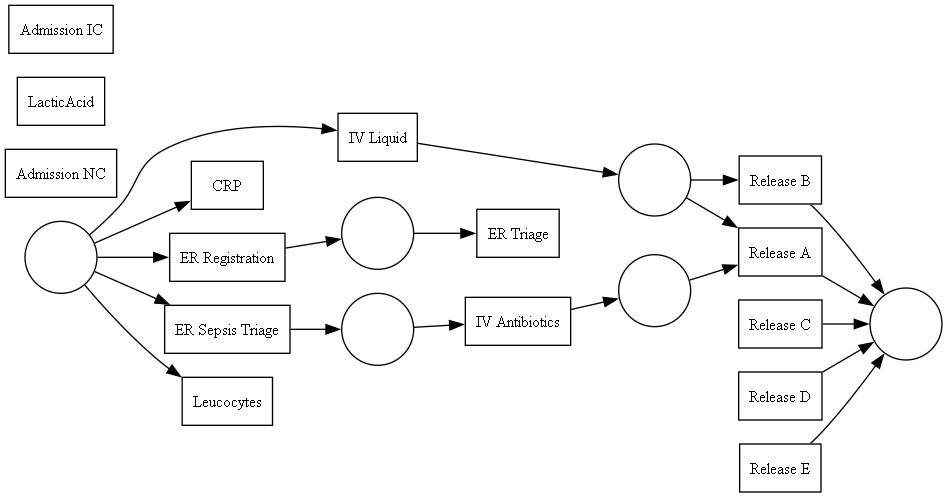

In [20]:
alpha_net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(cured_filtered_log)
pm4py.view_petri_net(alpha_net, im, fm, format='png')


## Inductive Miner

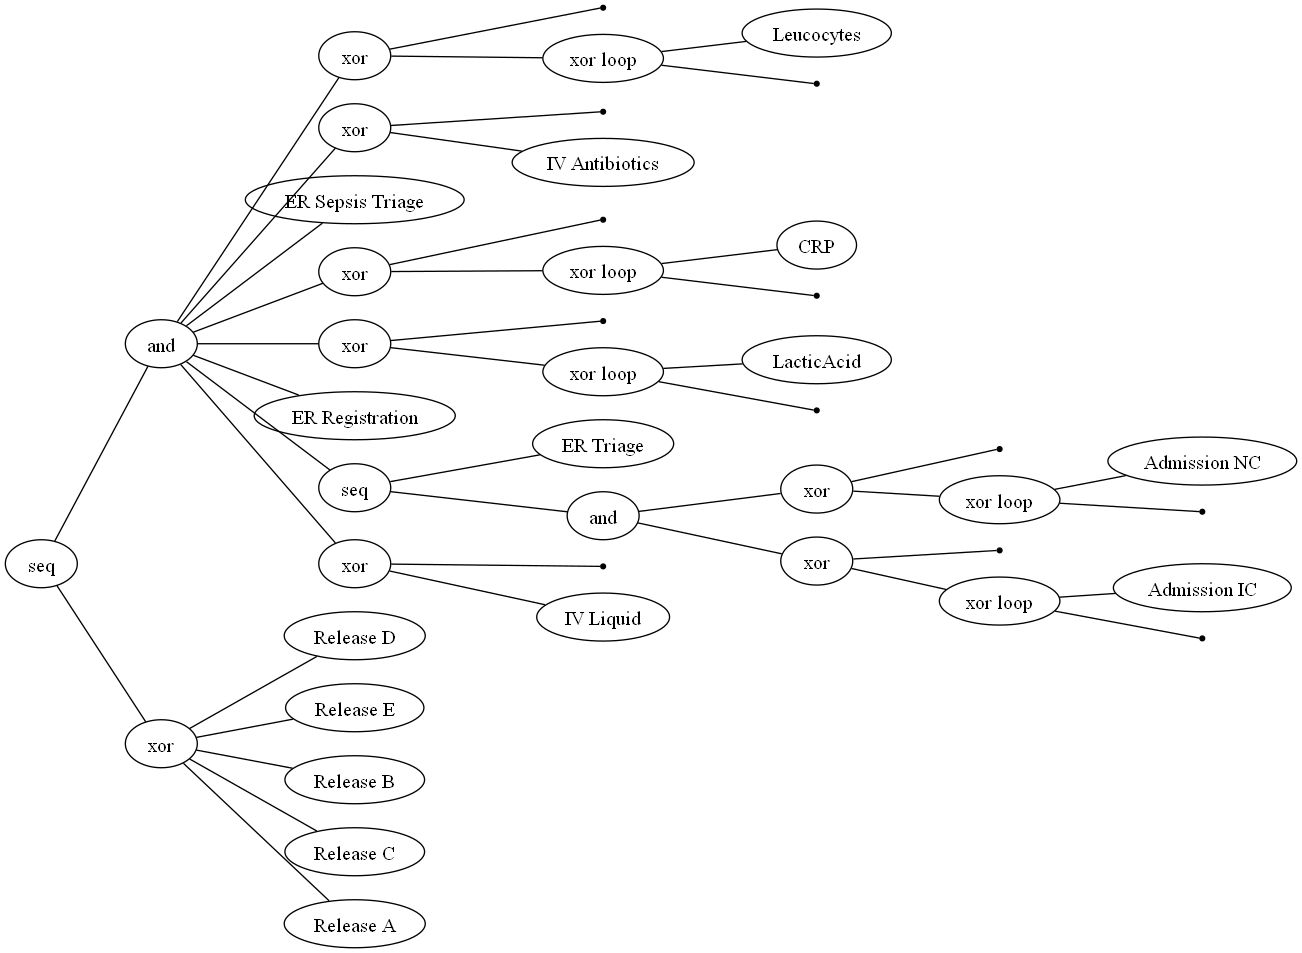

In [17]:
tree = pm4py.discover_process_tree_inductive(cured_filtered_log)

pm4py.view_process_tree(tree)


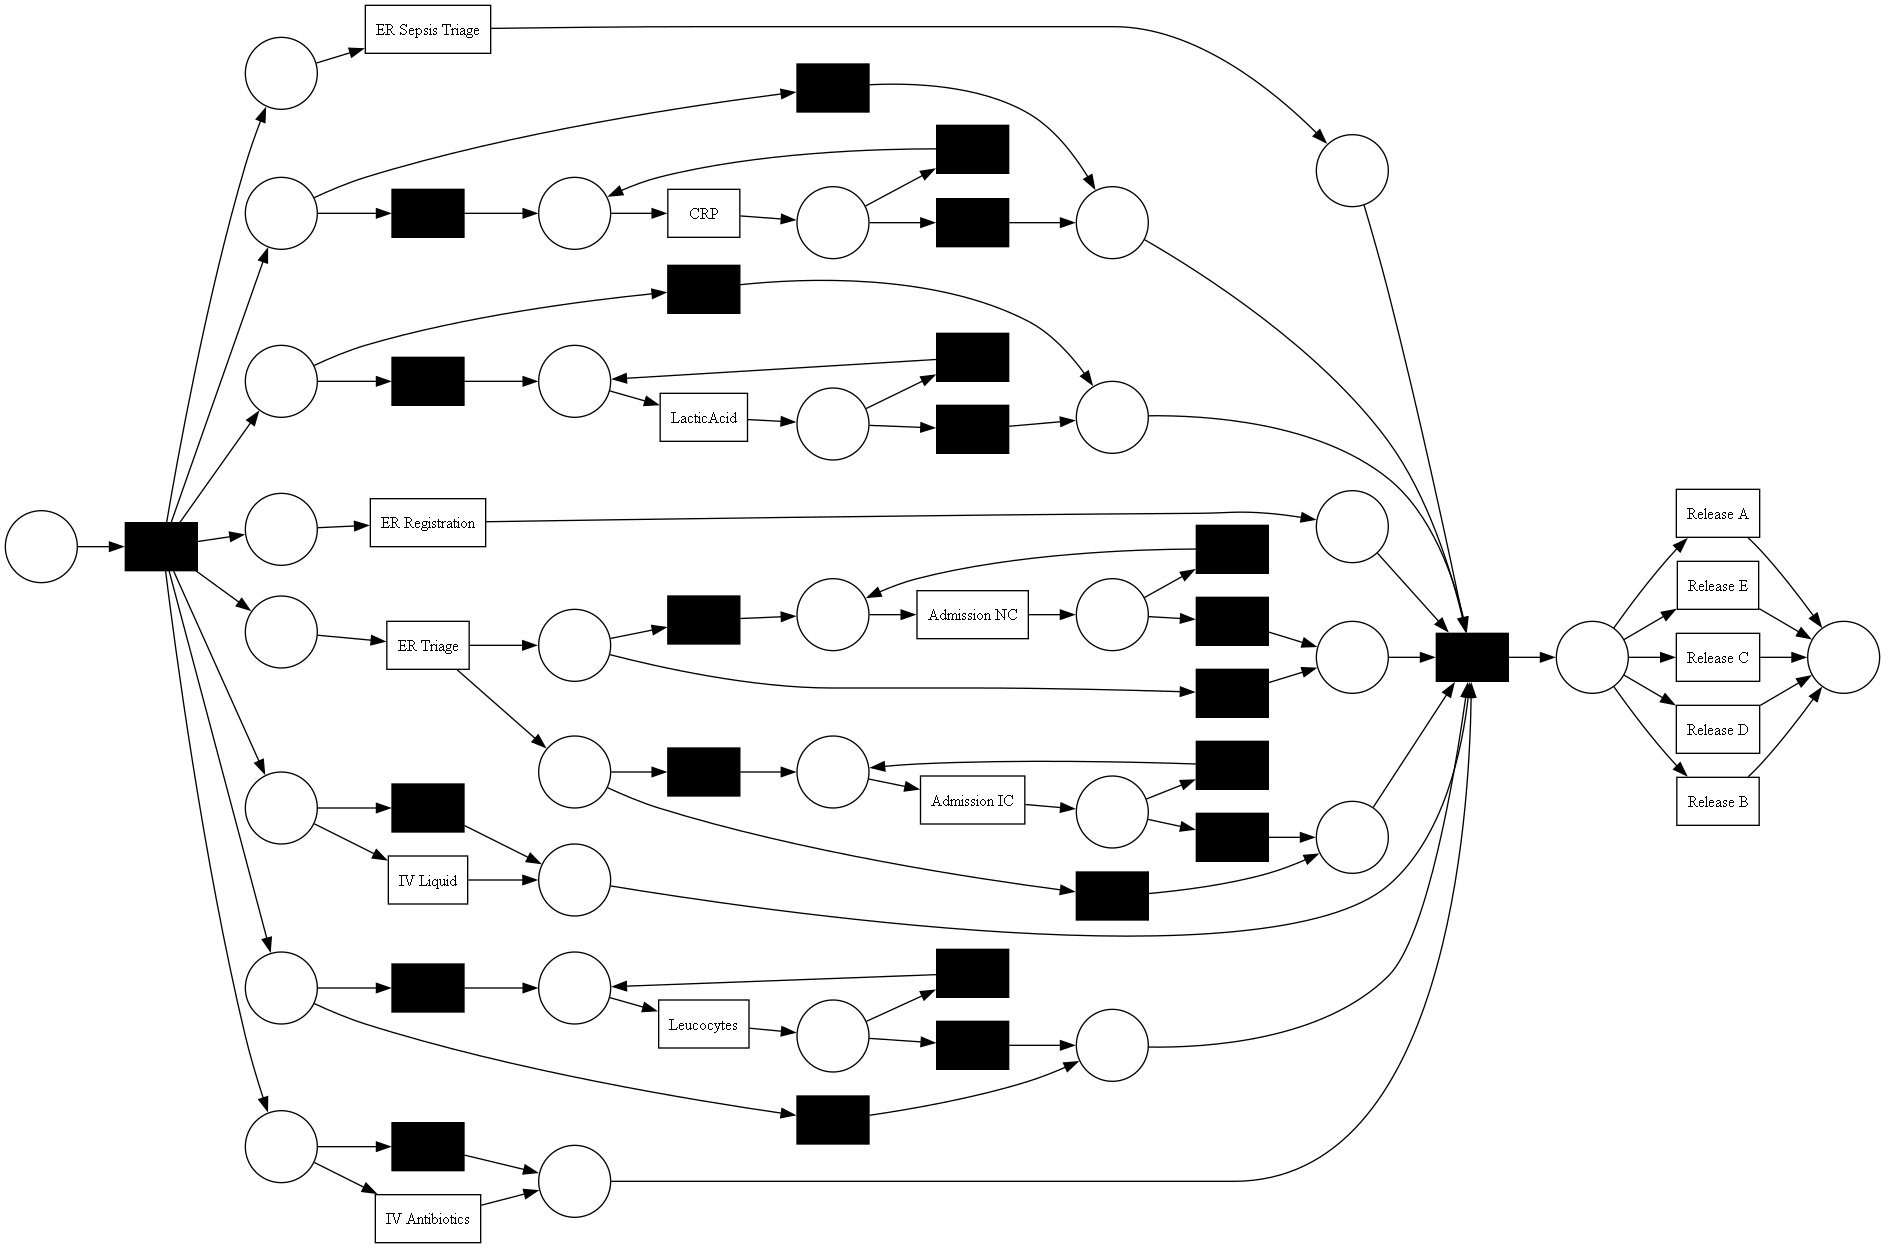

In [18]:

inductive_net, initial_marking, final_marking = pm4py.convert_to_petri_net(tree)
pm4py.view_petri_net(inductive_net, im, fm, format='png')


## Heuristic Miner

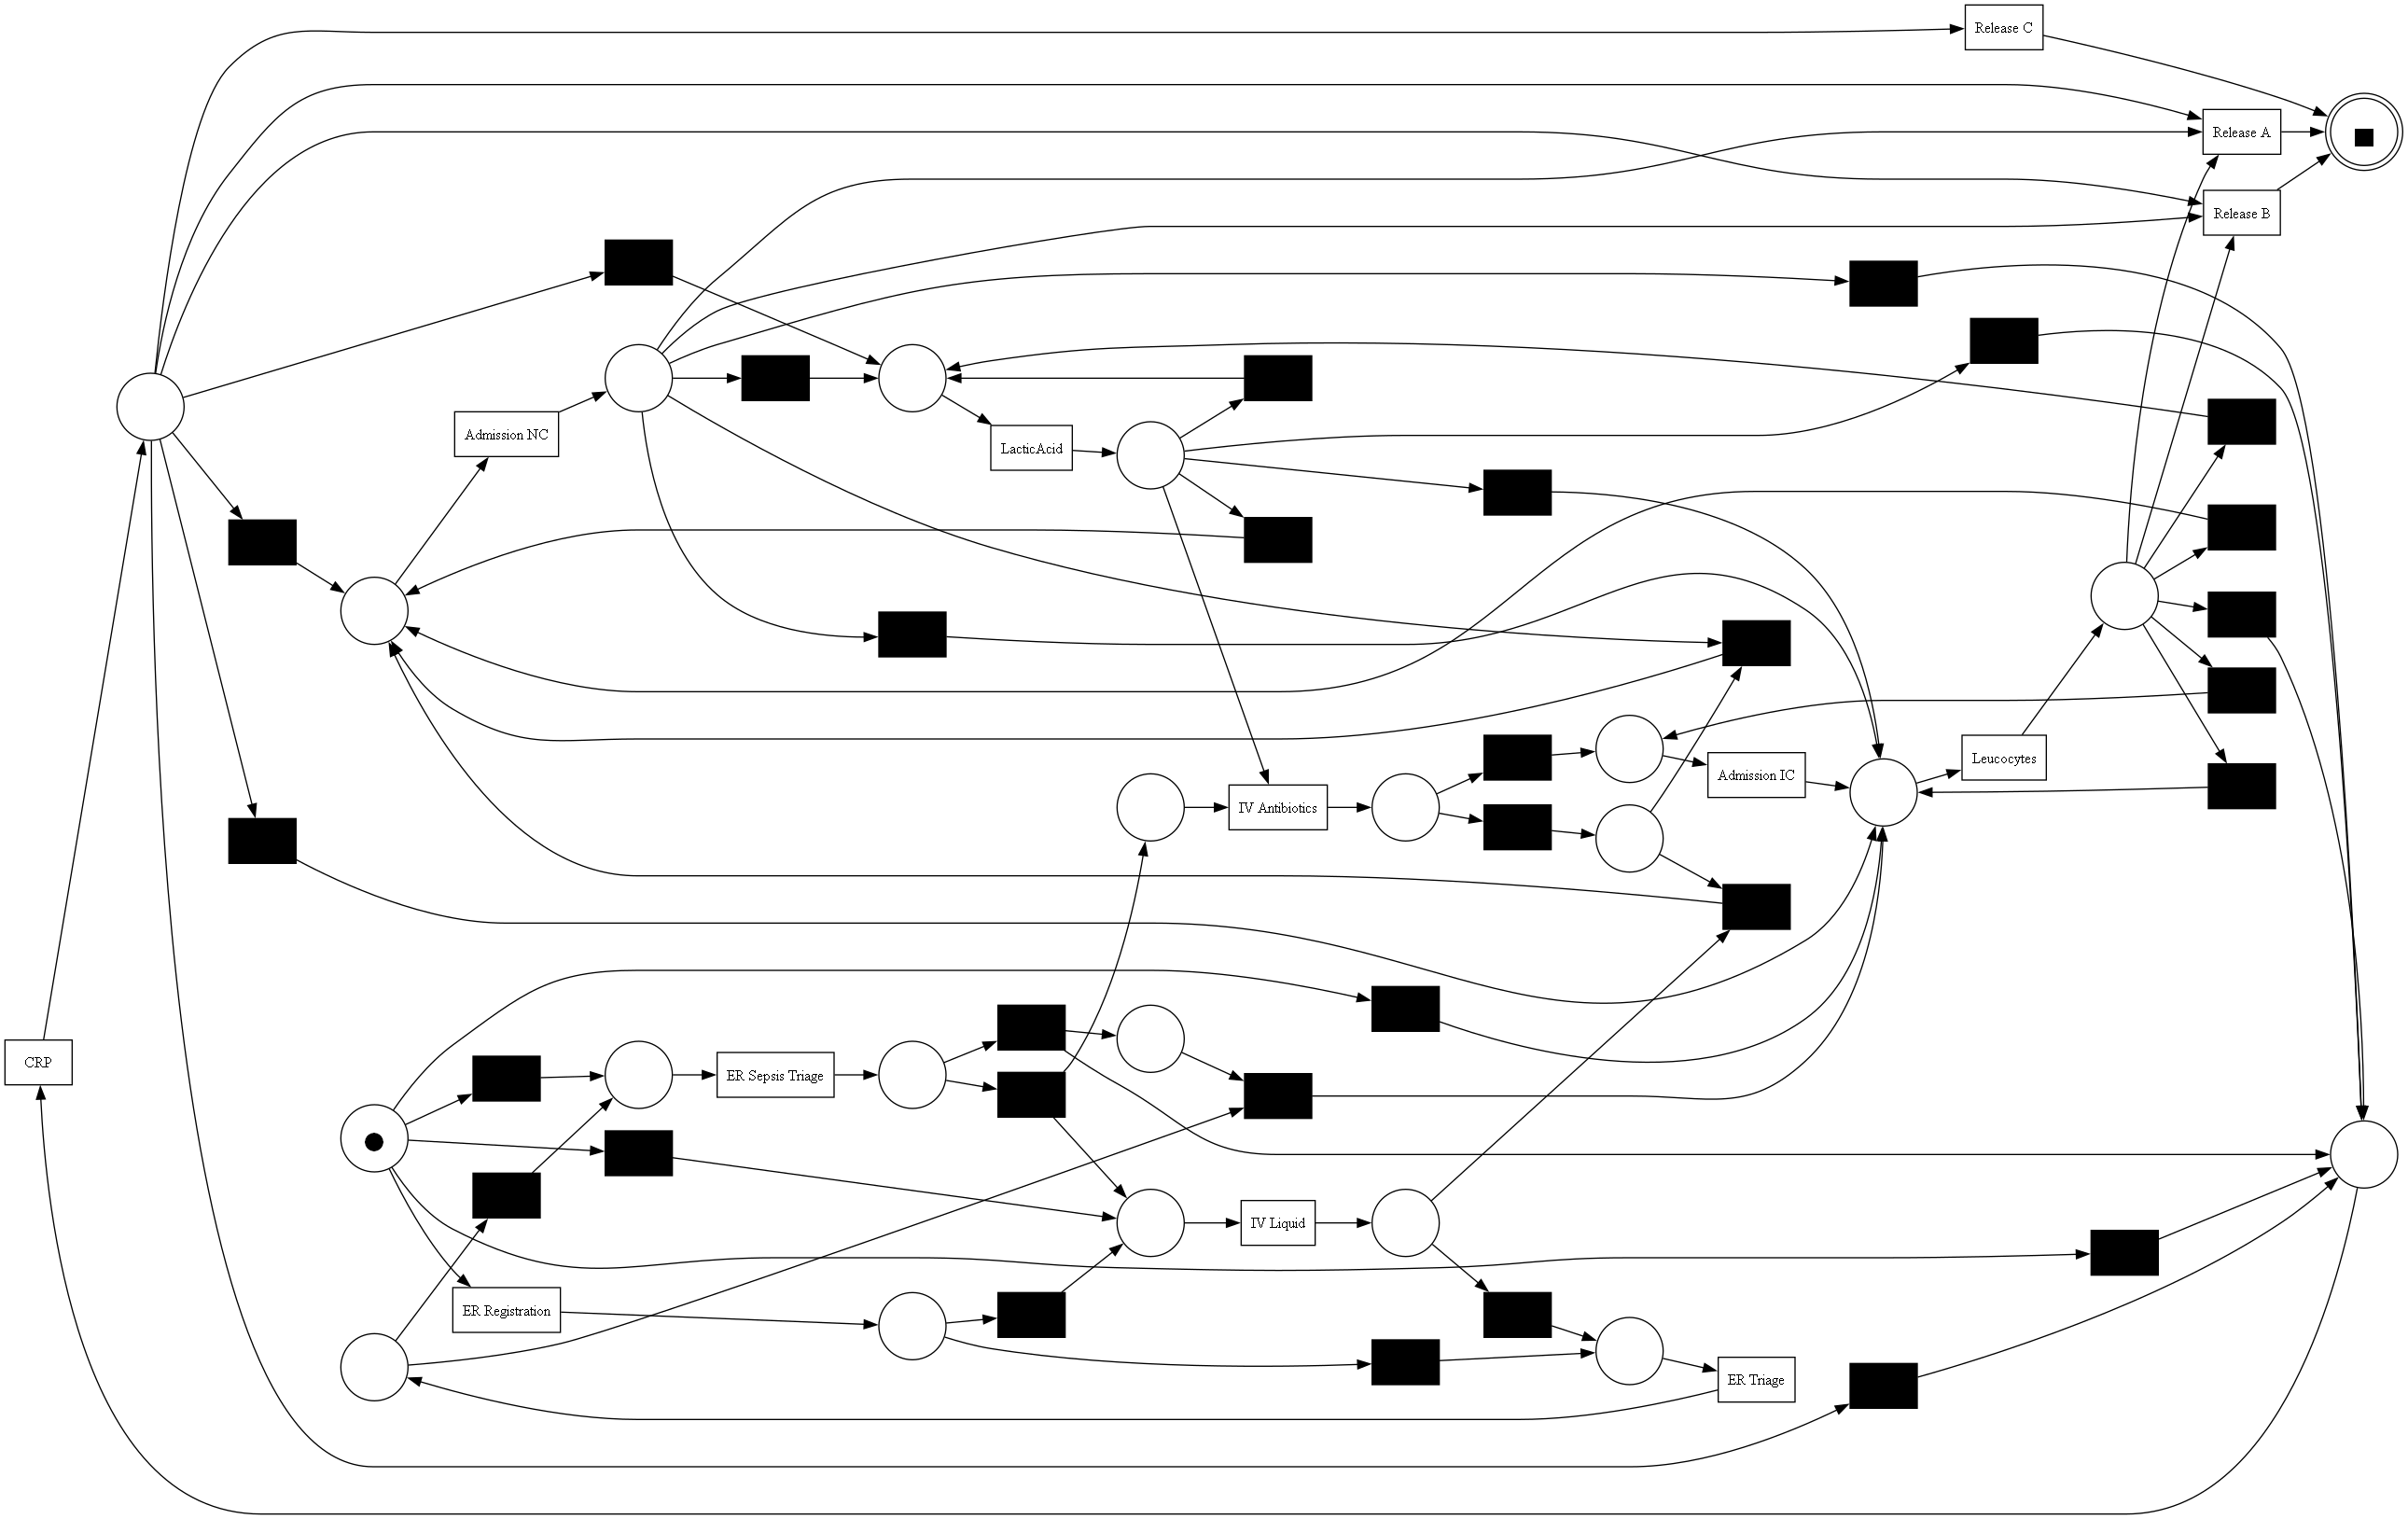

In [40]:
heu_pet_net, im, fm = pm4py.discover_petri_net_heuristics(cured_filtered_log, dependency_threshold=0.9, and_threshold=0.6, loop_two_threshold=0.7)
pm4py.view_petri_net(heu_pet_net, im, fm, format='png')


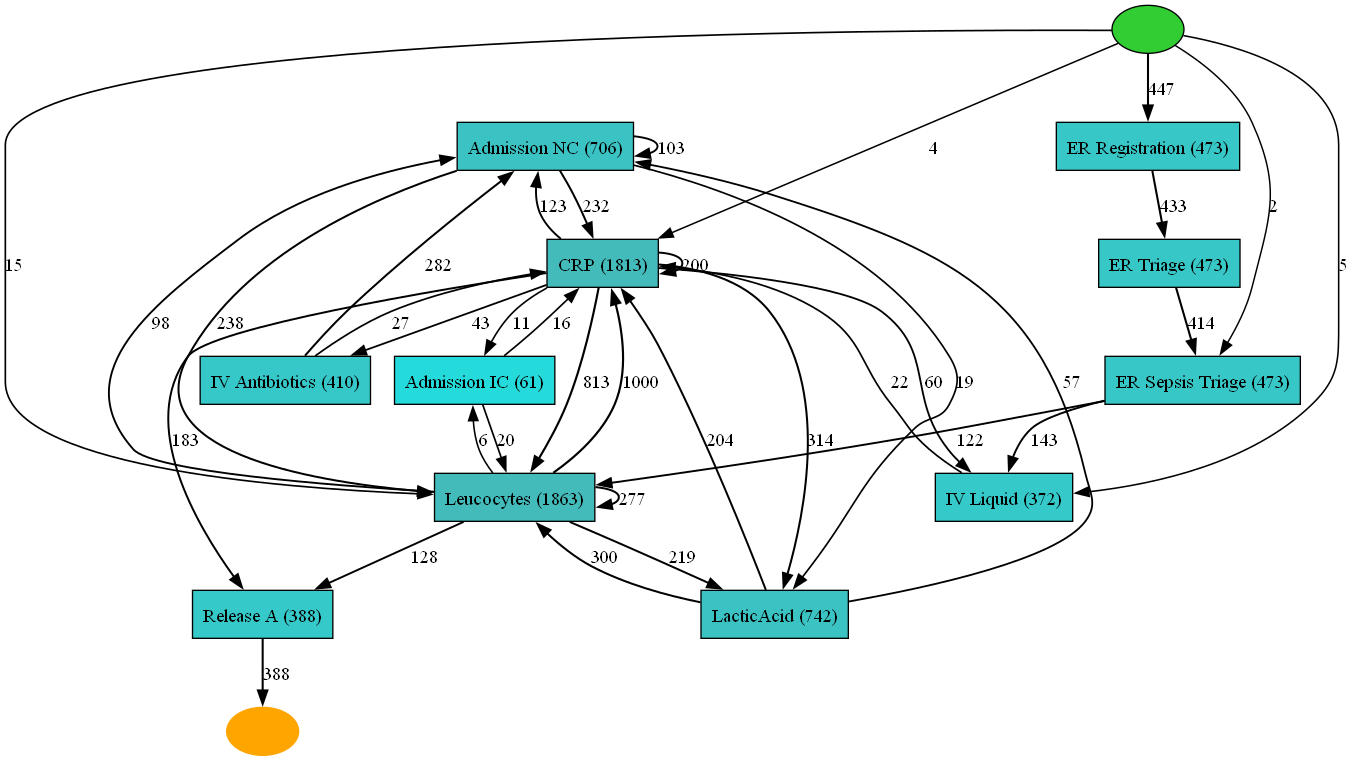

In [41]:
heu_net = pm4py.discover_heuristics_net(cured_filtered_log, dependency_threshold=0.99)
pm4py.view_heuristics_net(heu_net)


# Conformance Checking


- to check if the event log conforms to the model, and, vice versa.

In [45]:
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator

# fitness for alpha miner:
print("Alpha Miner Process Model Process Model replay based FITNESS:",pm4py.fitness_token_based_replay(cured_filtered_log, alpha_net, initial_marking, final_marking))
print("Alpha Miner Process Model Process Model replay based PRECISION:",pm4py.precision_token_based_replay(cured_filtered_log, alpha_net, initial_marking, final_marking))
print("Alpha Miner Process Model Process Model GENERALIZATION:", generalization_evaluator.apply(cured_filtered_log, alpha_net, initial_marking, final_marking))
print("Alpha Miner Process Model SIMPLISITY:", simplicity_evaluator.apply(alpha_net))


# fitness for inductive miner:
print("Inductive Model Process Model replay based FITNESS:",pm4py.fitness_token_based_replay(cured_filtered_log, inductive_net, initial_marking, final_marking))
print("Inductive Model Process Model replay based PRECISION:",pm4py.precision_token_based_replay(cured_filtered_log, inductive_net, initial_marking, final_marking))
print("Inductive Model Process Model GENERALIZATION:",generalization_evaluator.apply(cured_filtered_log, inductive_net, initial_marking, final_marking))
print("Inductive Model Process Model SIMPLISITY:",simplicity_evaluator.apply(inductive_net))


# fitness for huristic miner:
print("Heuristic Model Process Model replay based FITNESS:",pm4py.fitness_token_based_replay(cured_filtered_log, heu_pet_net, initial_marking, final_marking))
print("Heuristic Model Process Model replay based PRECISION:",pm4py.precision_token_based_replay(cured_filtered_log, heu_pet_net, initial_marking, final_marking))
print("Heuristic Model Process Model GENERALIZATION:",generalization_evaluator.apply(cured_filtered_log, heu_pet_net, initial_marking, final_marking))
print("Heuristic Model Process Model SIMPLISITY:",simplicity_evaluator.apply(heu_pet_net))


replaying log with TBR, completed traces :: 100%|██████████| 443/443 [00:00<00:00, 1901.55it/s]


Alpha Miner Process Model Process Model replay based FITNESS: {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.6640713641887948, 'log_fitness': 0.6460683774762976, 'percentage_of_fitting_traces': 0.0}


replaying log with TBR, completed traces :: 100%|██████████| 3525/3525 [00:00<00:00, 6071.85it/s]


Alpha Miner Process Model Process Model replay based PRECISION: 0.43992241762290196


replaying log with TBR, completed traces :: 100%|██████████| 443/443 [00:00<00:00, 1986.98it/s]


Alpha Miner Process Model Process Model GENERALIZATION: 0.8911004297297017
Alpha Miner Process Model SIMPLISITY: 1.0


replaying log with TBR, completed traces :: 100%|██████████| 443/443 [00:00<00:00, 969.24it/s] 


Inductive Model Process Model replay based FITNESS: {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.7872823606875278, 'log_fitness': 0.8257314745131661, 'percentage_of_fitting_traces': 0.0}


replaying log with TBR, completed traces :: 100%|██████████| 3525/3525 [00:00<00:00, 12748.08it/s]


Inductive Model Process Model replay based PRECISION: 1.0


replaying log with TBR, completed traces :: 100%|██████████| 443/443 [00:00<00:00, 893.27it/s] 


Inductive Model Process Model GENERALIZATION: 0.681268177091432
Inductive Model Process Model SIMPLISITY: 0.6068376068376068


replaying log with TBR, completed traces :: 100%|██████████| 443/443 [00:00<00:00, 797.56it/s]


Heuristic Model Process Model replay based FITNESS: {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.8273502658840333, 'log_fitness': 0.8544196226176235, 'percentage_of_fitting_traces': 0.0}


replaying log with TBR, completed traces :: 100%|██████████| 3525/3525 [00:00<00:00, 9972.49it/s] 


Heuristic Model Process Model replay based PRECISION: 1.0


replaying log with TBR, completed traces :: 100%|██████████| 443/443 [00:00<00:00, 812.38it/s]

Heuristic Model Process Model GENERALIZATION: 0.8035439991155292
Heuristic Model Process Model SIMPLISITY: 0.5076923076923077


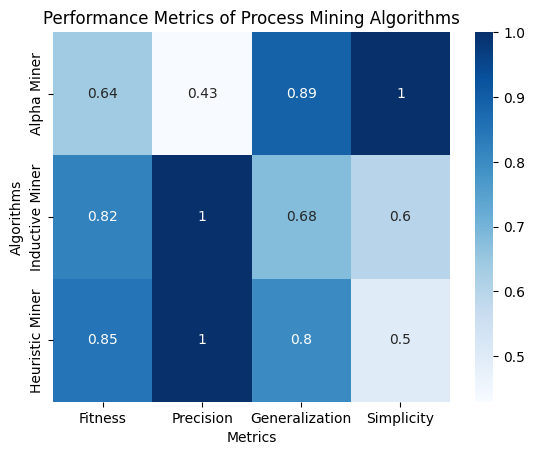

In [46]:
data = {'Algorithm': ['Alpha Miner', 'Inductive Miner', 'Heuristic Miner'],
        'Fitness': [0.64, 0.82, 0.85],
        'Precision': [0.43, 1., 1.0],
        'Generalization': [0.89, 0.68, 0.80],
        'Simplicity': [1.0, 0.6, 0.50]}
chart_dataframe = pd.DataFrame(data)
chart_dataframe.set_index('Algorithm', inplace=True)
sns.heatmap(chart_dataframe, annot=True, cmap='Blues')
plt.title('Performance Metrics of Process Mining Algorithms')
plt.xlabel('Metrics')
plt.ylabel('Algorithms')
plt.show()


# ML Decision Tree

In [154]:
# imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [129]:
# Function to process a group
def process_group(group):
    # Count occurrences of target values
    value_counts = group['concept:name'].value_counts()
    group['CRP_count'] = value_counts.get('CRP', 0)
    group['Leucocytes_count'] = value_counts.get('Leucocytes', 0)
    group['Lactic_Acid_count'] = value_counts.get('Lactic Acid', 0)

    # Create binary columns
    target_columns = ['ER Registration', 'IV Antibiotics', 'Admission IC', 'Admission NC', 'ER Sepsis Triage', 'IV Liquid', 'ER Triage']
    
    #target_values = ['CRP', 'Leucocytes', 'Lactic Acid']

    for target_value in target_columns:
        group[f'activity_{target_value}'] = (group['concept:name'] == target_value).astype(int)

    # Aggregate the data
    result = group.agg({'Age': 'max',
                        'InfectionSuspected': 'max',
                        'DisfuncOrg': 'max',
                        'Hypotensie': 'max',
                        'Infusion': 'max',
                        'Oligurie': 'max',
                        'Hypoxie': 'max',
                        'DiagnosticBlood': 'max',
                        'DiagnosticArtAstrup': 'max',
                        'DiagnosticIC': 'max',
                        'DiagnosticSputum': 'max',
                        'DiagnosticLiquor': 'max',
                        'DiagnosticOther': 'max',
                        'DiagnosticXthorax': 'max',
                        'DiagnosticUrinaryCulture': 'max',
                        'DiagnosticLacticAcid': 'max',
                        'DiagnosticUrinarySediment': 'max',
                        'DiagnosticECG': 'max',
                        'SIRSCriteriaCount': 'max',
                        'CRP_count': 'max',
                        'Lactic_Acid_count': 'max',
                        'activity_ER Triage': 'max',
                        'activity_ER Sepsis Triage': 'max',
                        'activity_IV Liquid': 'max',
                        'activity_IV Antibiotics': 'max',
                        'activity_Admission NC': 'max',
                        'activity_Admission IC': 'max',})
    
    # Get the last value of 'concept:name' for the group
    result['end_activity'] = group['concept:name'].iloc[-1]
    return result

# Group by 'Case Name' and apply the processing function
# Using filtered_log -> No zero duration, No Wrong End Activities
pred_df = filtered_log.groupby('Case Name').apply(process_group)


C:\Users\Sarja\AppData\Local\Temp\ipykernel_21212\3877413028.py:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pred_df = filtered_log.groupby('Case Name').apply(process_group)


In [155]:
pred_df


,Age,InfectionSuspected,DisfuncOrg,Hypotensie,Infusion,Oligurie,Hypoxie,DiagnosticBlood,DiagnosticArtAstrup,DiagnosticIC,DiagnosticSputum,DiagnosticLiquor,DiagnosticOther,DiagnosticXthorax,DiagnosticUrinaryCulture,DiagnosticLacticAcid,DiagnosticUrinarySediment,DiagnosticECG,SIRSCriteriaCount,CRP_count,Lactic_Acid_count,activity_ER Triage,activity_ER Sepsis Triage,activity_IV Liquid,activity_IV Antibiotics,activity_Admission NC,activity_Admission IC,end_activity
Case Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,85.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,7.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Release A
ABA,75.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Release A
AGA,85.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Release A
AH,70.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,3.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,Release A
AHA,60.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Release A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZU,90.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Release A
ZV,75.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Release A
ZW,85.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Release A


In [131]:
pred_df['end_activity'].unique()


array(['Release A', 'Release B', 'Release E', 'Release C', 'Release D'],
      dtype=object)

In [132]:
pred_df.columns


Index(['Age', 'InfectionSuspected', 'DisfuncOrg', 'Hypotensie', 'Infusion',
       'Oligurie', 'Hypoxie', 'DiagnosticBlood', 'DiagnosticArtAstrup',
       'DiagnosticIC', 'DiagnosticSputum', 'DiagnosticLiquor',
       'DiagnosticOther', 'DiagnosticXthorax', 'DiagnosticUrinaryCulture',
       'DiagnosticLacticAcid', 'DiagnosticUrinarySediment', 'DiagnosticECG',
       'SIRSCriteriaCount', 'CRP_count', 'Lactic_Acid_count',
       'activity_ER Triage', 'activity_ER Sepsis Triage', 'activity_IV Liquid',
       'activity_IV Antibiotics', 'activity_Admission NC',
       'activity_Admission IC', 'end_activity'],
      dtype='object')

### Encoding

In [156]:
one_hot_encoded_data = pd.get_dummies(pred_df, columns = ['end_activity'])
one_hot_encoded_data = one_hot_encoded_data.replace({True: 1, False: 0})
one_hot_encoded_data


C:\Users\Sarja\AppData\Local\Temp\ipykernel_21212\3476881504.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  one_hot_encoded_data = one_hot_encoded_data.replace({True: 1, False: 0})


,Age,InfectionSuspected,DisfuncOrg,Hypotensie,Infusion,Oligurie,Hypoxie,DiagnosticBlood,DiagnosticArtAstrup,DiagnosticIC,DiagnosticSputum,DiagnosticLiquor,DiagnosticOther,DiagnosticXthorax,DiagnosticUrinaryCulture,DiagnosticLacticAcid,DiagnosticUrinarySediment,DiagnosticECG,SIRSCriteriaCount,CRP_count,Lactic_Acid_count,activity_ER Triage,activity_ER Sepsis Triage,activity_IV Liquid,activity_IV Antibiotics,activity_Admission NC,activity_Admission IC,end_activity_Release A,end_activity_Release B,end_activity_Release C,end_activity_Release D,end_activity_Release E
Case Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,85.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,7.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,0,0,0,0
ABA,75.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,0,0,0,0
AGA,85.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,0,0,0,0
AH,70.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,3.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1,0,0,0,0
AHA,60.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZU,90.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,0,0,0,0
ZV,75.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,0,0,0,0
ZW,85.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1,0,0,0,0


In [157]:
one_hot_encoded_data.columns


Index(['Age', 'InfectionSuspected', 'DisfuncOrg', 'Hypotensie', 'Infusion',
       'Oligurie', 'Hypoxie', 'DiagnosticBlood', 'DiagnosticArtAstrup',
       'DiagnosticIC', 'DiagnosticSputum', 'DiagnosticLiquor',
       'DiagnosticOther', 'DiagnosticXthorax', 'DiagnosticUrinaryCulture',
       'DiagnosticLacticAcid', 'DiagnosticUrinarySediment', 'DiagnosticECG',
       'SIRSCriteriaCount', 'CRP_count', 'Lactic_Acid_count',
       'activity_ER Triage', 'activity_ER Sepsis Triage', 'activity_IV Liquid',
       'activity_IV Antibiotics', 'activity_Admission NC',
       'activity_Admission IC', 'end_activity_Release A',
       'end_activity_Release B', 'end_activity_Release C',
       'end_activity_Release D', 'end_activity_Release E'],
      dtype='object')

### Train

In [158]:
train_col = ['Age', 'InfectionSuspected', 'DisfuncOrg', 'Hypotensie', 'Infusion',
       'Oligurie', 'Hypoxie', 'DiagnosticBlood', 'DiagnosticArtAstrup',
       'DiagnosticIC', 'DiagnosticSputum', 'DiagnosticLiquor',
       'DiagnosticOther', 'DiagnosticXthorax', 'DiagnosticUrinaryCulture',
       'DiagnosticLacticAcid', 'DiagnosticUrinarySediment', 'DiagnosticECG',
       'SIRSCriteriaCount', 'CRP_count', 'Lactic_Acid_count',
       'activity_ER Triage', 'activity_ER Sepsis Triage', 'activity_IV Liquid',
       'activity_IV Antibiotics', 'activity_Admission NC',
       'activity_Admission IC',]

result_col = ['end_activity_Release A',
       'end_activity_Release B', 'end_activity_Release C',
       'end_activity_Release D', 'end_activity_Release E']

# Assuming you have more features, select relevant ones for training
X = one_hot_encoded_data[train_col]  # Features
y = one_hot_encoded_data[result_col]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


<Axes: >

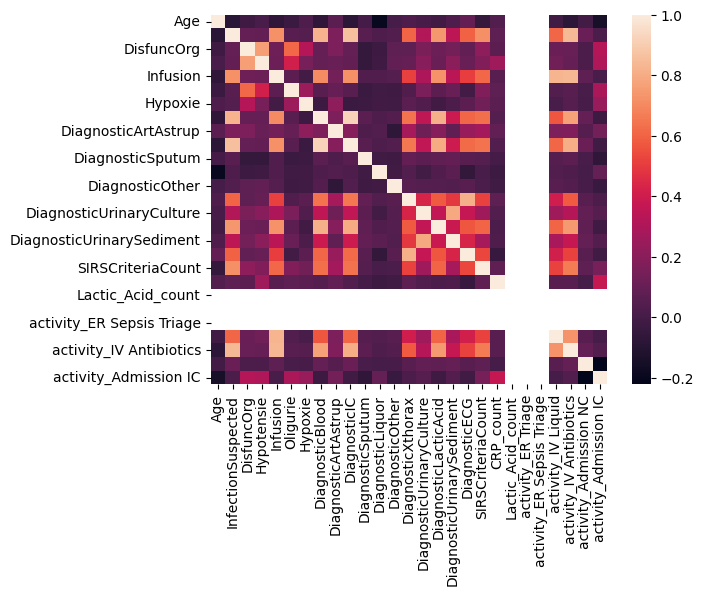

In [159]:
# Correlation matrix
X_train.corr()
sns.heatmap(X_train.corr())


In [160]:
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train) #clf.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [161]:
y_pred = best_model.predict(X_test)


## Performance

In [162]:
from sklearn.metrics import classification_report, accuracy_score
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=result_col, zero_division=1))


Accuracy: 0.8

Classification Report:
                         precision    recall  f1-score   support

end_activity_Release A       0.83      0.98      0.90       110
end_activity_Release B       1.00      0.00      0.00        15
end_activity_Release C       1.00      0.00      0.00         3
end_activity_Release D       1.00      0.00      0.00         5
end_activity_Release E       1.00      0.00      0.00         2

             micro avg       0.83      0.80      0.82       135
             macro avg       0.97      0.20      0.18       135
          weighted avg       0.86      0.80      0.73       135
           samples avg       0.84      0.80      0.80       135

